In [1]:
from nba_api.stats.endpoints import leaguedashplayerclutch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Imports successful")

Imports successful


In [3]:
clutch_stats = leaguedashplayerclutch.LeagueDashPlayerClutch(
    season = '2024-25',
    clutch_time = 'Last 5 Minutes',
    ahead_behind = 'Ahead or Behind',
    point_diff = 5,
    per_mode_detailed = 'PerGame'
)

clutch_df = clutch_stats.get_data_frames()[0]

# filter to players with sig clutch mins
clutch_df = clutch_df[clutch_df['MIN'] > 2]

print(f"Players with clutch time: {len(clutch_df)}")
print("\nColumns available:")
print(clutch_df.columns.tolist())

Players with clutch time: 334

Columns available:
['GROUP_SET', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT']


Top 15 Clutch Scorers:
     PLAYER_NAME  MIN  PTS  FG_PCT  FG3_PCT
     RayJ Dennis 11.2  7.0   0.600    0.500
   Johnny Furphy 11.2  6.0   0.600    0.000
   Jalen Brunson  4.8  5.6   0.515    0.294
      JD Davison  4.5  5.0   0.500    1.000
      Pete Nance  5.3  5.0   1.000    1.000
    Tyrese Maxey  4.3  4.9   0.466    0.345
    Nikola Jokić  4.2  4.2   0.562    0.429
Josh Christopher  4.7  4.0   0.250    0.000
    Torrey Craig  3.6  4.0   0.750    1.000
      Trae Young  4.0  4.0   0.364    0.333
 Anthony Edwards  3.8  3.7   0.426    0.323
   DeMar DeRozan  4.1  3.6   0.441    0.200
   Stephen Curry  3.2  3.6   0.417    0.373
       Ja Morant  3.8  3.4   0.463    0.333
 Anfernee Simons  3.2  3.2   0.451    0.385


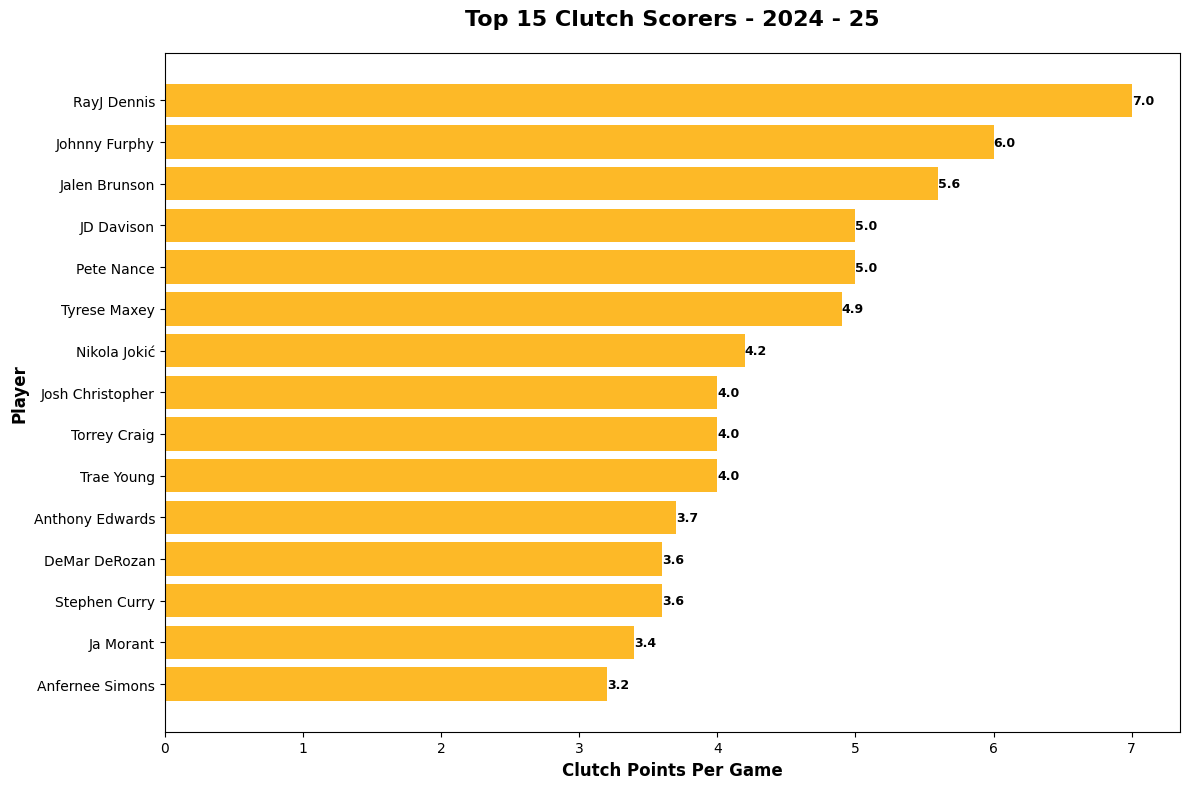

In [5]:
top_clutch = clutch_df.nlargest(15, 'PTS')

print("Top 15 Clutch Scorers:")
print(top_clutch[['PLAYER_NAME', 'MIN', 'PTS', 'FG_PCT', 'FG3_PCT']].to_string(index = False))

plt.figure(figsize = (12, 8))
plt.barh(top_clutch['PLAYER_NAME'], top_clutch['PTS'], color = '#FDB927')
plt.xlabel('Clutch Points Per Game', fontsize = 12, fontweight = 'bold')
plt.ylabel('Player', fontsize = 12, fontweight = 'bold')
plt.title('Top 15 Clutch Scorers - 2024 - 25', fontsize = 16, fontweight = 'bold', pad = 20)
plt.gca().invert_yaxis()

for i, (player, pts) in enumerate(zip(top_clutch['PLAYER_NAME'], top_clutch['PTS'])):
    plt.text(pts, i, f'{pts:.1f}', va = 'center', fontsize = 9, fontweight = 'bold')

plt.tight_layout()
plt.savefig('../visualizations/top_clutch_scorers.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [14]:
# clutch vs overall performance
# need regular stats for comparison
from nba_api.stats.endpoints import leaguedashplayerstats

regular_stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season = '2024-25',
    per_mode_detailed = 'PerGame'
)

regular_df = regular_stats.get_data_frames()[0]

# merge clutch and regular
comparison_df = clutch_df.merge(
    regular_df[['PLAYER_ID', 'PLAYER_NAME', 'PTS', 'FG_PCT', 'MIN', 'GP']],
    on = 'PLAYER_ID',
    suffixes = ('_CLUTCH', '_REGULAR')
)

# Calculate per-minute scoring rates
comparison_df['PTS_PER_MIN_CLUTCH'] = comparison_df['PTS_CLUTCH'] / comparison_df['MIN_CLUTCH']
comparison_df['PTS_PER_MIN_REGULAR'] = comparison_df['PTS_REGULAR'] / comparison_df['MIN_REGULAR']

# Calculate clutch scoring rate difference
comparison_df['CLUTCH_SCORING_RATE_DIFF'] = comparison_df['PTS_PER_MIN_CLUTCH'] - comparison_df['PTS_PER_MIN_REGULAR']

# Also keep FG% difference
comparison_df['FG_PCT_DIFF'] = comparison_df['FG_PCT_CLUTCH'] - comparison_df['FG_PCT_REGULAR']

# Filter for meaningful sample
meaningful_players = comparison_df[
    (comparison_df['MIN_REGULAR'] >= 15) &
    (comparison_df['GP_CLUTCH'] >= 5)
].copy()

# Find true clutch performers
clutch_performers = meaningful_players.nlargest(10, 'CLUTCH_SCORING_RATE_DIFF')

print("\nPlayers who elevate scoring rate in clutch:")
print(clutch_performers[['PLAYER_NAME_CLUTCH', 'PTS_PER_MIN_REGULAR', 'PTS_PER_MIN_CLUTCH', 'CLUTCH_SCORING_RATE_DIFF']].to_string(index = False))


Players who elevate scoring rate in clutch:
PLAYER_NAME_CLUTCH  PTS_PER_MIN_REGULAR  PTS_PER_MIN_CLUTCH  CLUTCH_SCORING_RATE_DIFF
      Kelly Olynyk             0.430693            0.909091                  0.478398
      Tyrese Maxey             0.697613            1.139535                  0.441922
     Jalen Brunson             0.734463            1.166667                  0.432203
   Anfernee Simons             0.590214            1.000000                  0.409786
     Stephen Curry             0.760870            1.125000                  0.364130
        Trae Young             0.672222            1.000000                  0.327778
       Alex Caruso             0.367876            0.695652                  0.327777
      Jordan Poole             0.697279            0.960000                  0.262721
 Tyrese Haliburton             0.553571            0.815789                  0.262218
     DeMar DeRozan             0.618384            0.878049                  0.259664


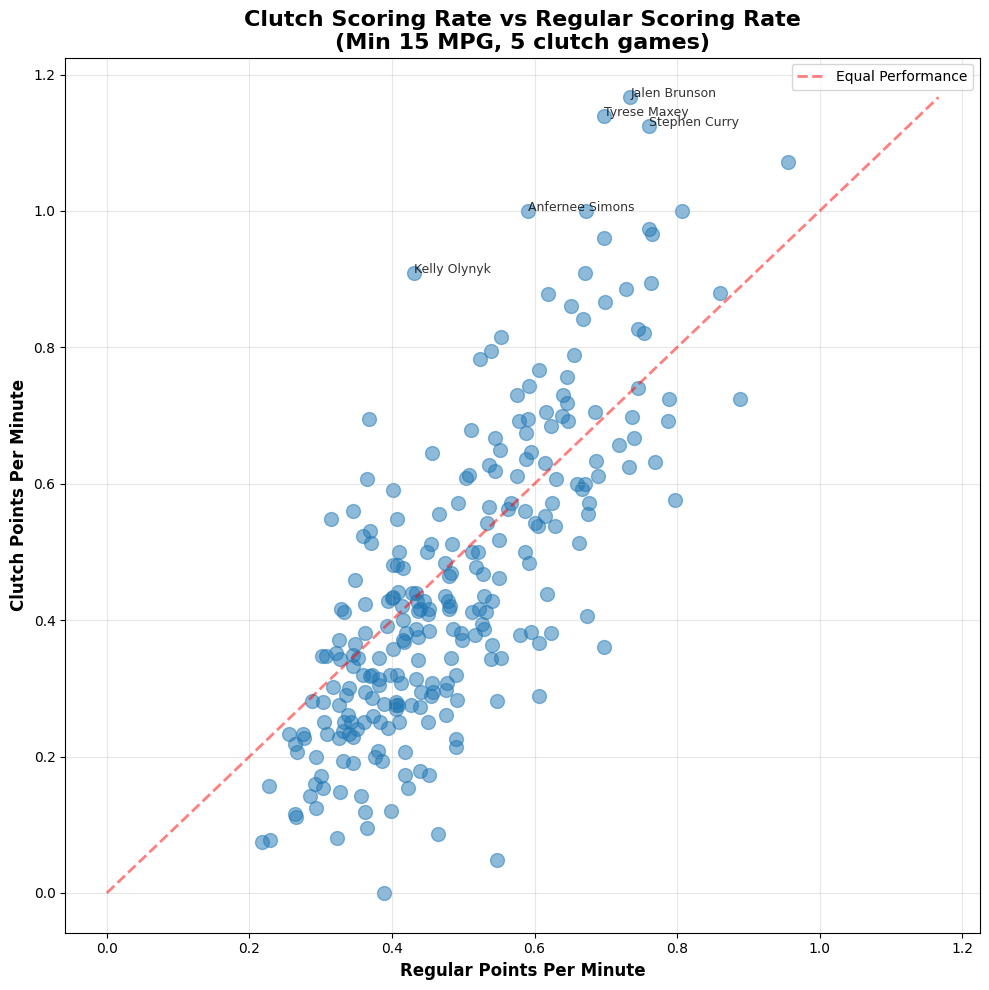


Showing 261 players with meaningful clutch minutes


In [15]:
plt.figure(figsize = (10,10))

plt.scatter(meaningful_players['PTS_PER_MIN_REGULAR'], 
            meaningful_players['PTS_PER_MIN_CLUTCH'],
            alpha = 0.5, s = 100)

# add line (y = x) where clutch rate equals regular rate
max_rate = max(meaningful_players['PTS_PER_MIN_REGULAR'].max(), 
               meaningful_players['PTS_PER_MIN_CLUTCH'].max())
plt.plot([0, max_rate], [0, max_rate], 'r--', alpha = 0.5, linewidth = 2, label = 'Equal Performance')

plt.xlabel('Regular Points Per Minute', fontsize = 12, fontweight = 'bold')
plt.ylabel('Clutch Points Per Minute', fontsize = 12, fontweight = 'bold')
plt.title('Clutch Scoring Rate vs Regular Scoring Rate\n(Min 15 MPG, 5 clutch games)', fontsize = 16, fontweight = 'bold')
plt.legend()
plt.grid(alpha = 0.3)

# annotate clutch performers
for _, row in clutch_performers.head(5).iterrows():
    plt.annotate(row['PLAYER_NAME_CLUTCH'],
                 (row['PTS_PER_MIN_REGULAR'], row['PTS_PER_MIN_CLUTCH']), 
                 fontsize = 9, alpha = 0.8)

plt.tight_layout()
plt.savefig('../visualizations/clutch_vs_regular.png', dpi = 300, bbox_inches = 'tight')
plt.show()

print(f"\nShowing {len(meaningful_players)} players with meaningful clutch minutes")



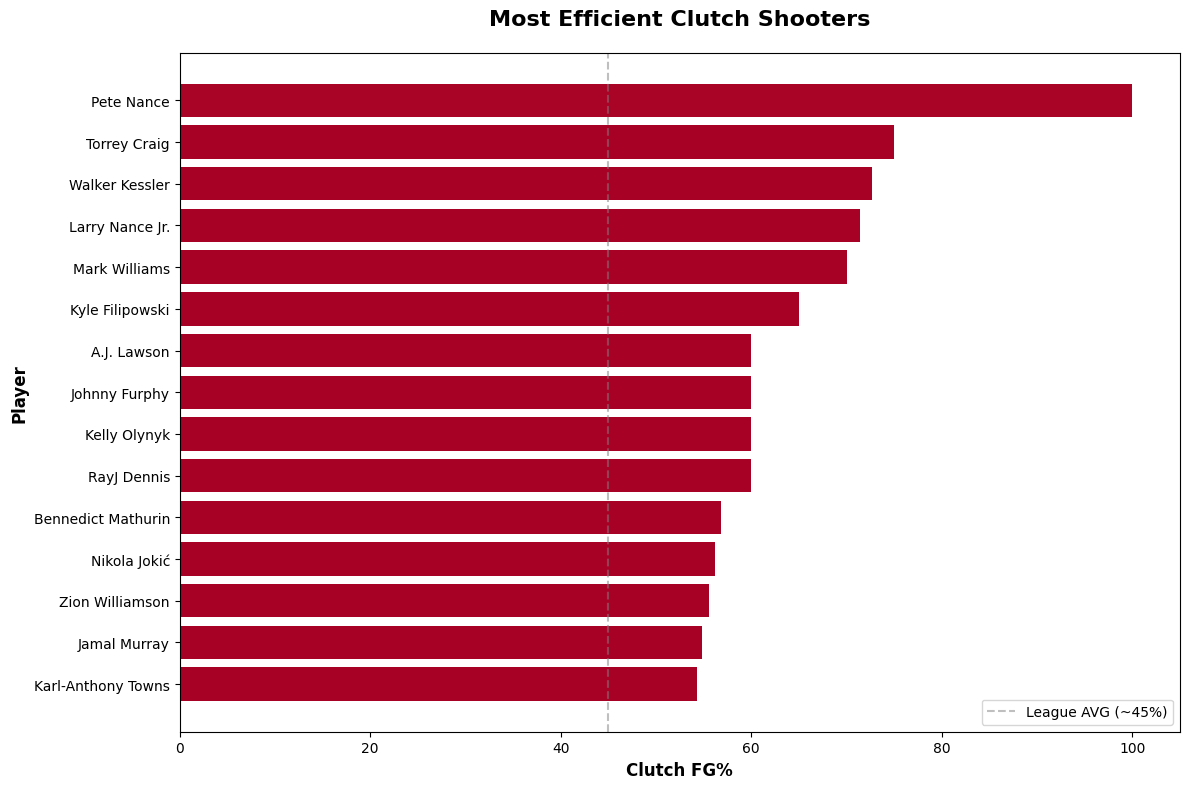


Most efficient in clutch:
       PLAYER_NAME  FGA  FG_PCT
        Pete Nance  2.0   1.000
      Torrey Craig  2.0   0.750
    Walker Kessler  1.2   0.727
   Larry Nance Jr.  1.8   0.714
     Mark Williams  1.3   0.700
   Kyle Filipowski  1.4   0.650
       A.J. Lawson  1.7   0.600
     Johnny Furphy  5.0   0.600
      Kelly Olynyk  1.3   0.600
       RayJ Dennis  5.0   0.600
Bennedict Mathurin  1.4   0.568
      Nikola Jokić  2.7   0.562
   Zion Williamson  1.4   0.556
      Jamal Murray  1.4   0.548
Karl-Anthony Towns  1.3   0.543


In [18]:
# most efficient clutch shooters
clutch_df = clutch_df[clutch_df['FGA']>1]
top_efficient_clutch = clutch_df.nlargest(15, 'FG_PCT')

plt.figure(figsize = (12, 8 ))
colors = plt.cm.RdYlGn(top_efficient_clutch['FG_PCT']/100)
plt.barh(top_efficient_clutch['PLAYER_NAME'], top_efficient_clutch['FG_PCT'] * 100,
         color = colors)
plt.xlabel('Clutch FG%', fontsize = 12, fontweight = 'bold')
plt.ylabel('Player', fontsize = 12, fontweight = 'bold')
plt.title('Most Efficient Clutch Shooters', fontsize = 16, fontweight = 'bold', pad = 20)
plt.gca().invert_yaxis()
plt.axvline(x = 45, color = 'gray', linestyle = '--', alpha = 0.5, label = 'League AVG (~45%)')
plt.legend()
plt.tight_layout()
plt.show()

print('\nMost efficient in clutch:')
print(top_efficient_clutch[['PLAYER_NAME', 'FGA', 'FG_PCT']].to_string(index = False))